3.<br>
Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations –<br>
(a)	Apply average and median spatial filters with 5x5 mask and observe their performance for noise suppression in term of PSNR<br>
(b)	Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR<br>
(c)	Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR<br>


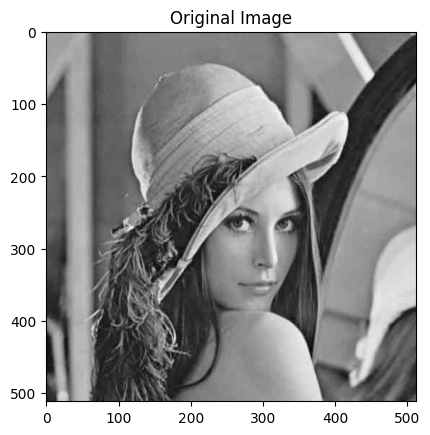

In [174]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

original_img = cv2.imread("Images/Luna.jpeg")
original_img = cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)


# Show
plt.imshow(original_img,cmap='gray')
plt.title("Original Image")
plt.show()

In [175]:
def salt_pepper(imgg,type='both',amount=0.5):
    
    noisy_img = imgg.copy()

    height,width = imgg.shape
    
    effected_pixels = int(height*width*amount)
    print("effected pixels : ",effected_pixels)


    for i in range (0,effected_pixels):
        
        x = random.randint(0,height-1)
        y = random.randint(0,width-1)
        
        if(type=='both'):
            if x%2==0:
                noisy_img[x][y] = 255 # Salt
            else:
                noisy_img[x][y] = 0

        elif(type=='salt'):
            noisy_img[x][y] = 255 # Salt

        else:
            noisy_img[x][y] = 0 # Pepper   

    return noisy_img      
    

effected pixels :  52428


Text(0.5, 1.0, 'Salt-Pepper Image')

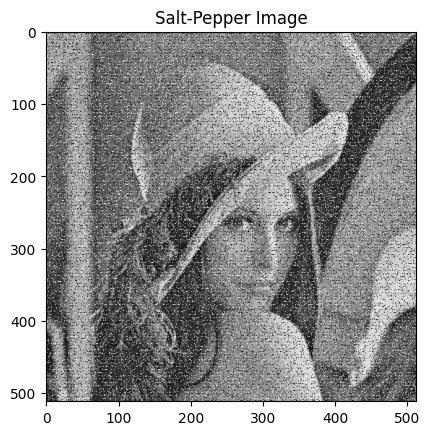

In [176]:
noisy_img = salt_pepper(original_img,amount=0.2)
plt.imshow(noisy_img,cmap='gray')
plt.title("Salt-Pepper Image")

In [177]:
def avg_median_filter (noisy_img, filtertype="median",mask_size=3) :

    filtered_img = noisy_img.copy()
    height, width = noisy_img.shape

    mask_size = mask_size
    mask_left = mask_size//2
    mask_right = mask_left+1

    if filtertype=="median":
        for i in range (mask_left,height):
            for j in range (mask_left,width):
                # print(filtered_img[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)])
                median = np.median(filtered_img[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)])
                filtered_img[i][j] = median


    else:
        for i in range (mask_left,height):
            for j in range (mask_left,width):
                sum = np.sum(filtered_img[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)])
                filtered_img[i][j] = sum//(mask_size*mask_size)

    return filtered_img


# 3a.

Text(0.5, 1.0, 'Average Filter, Mask 7x7, PSNR 12.946454624050185')

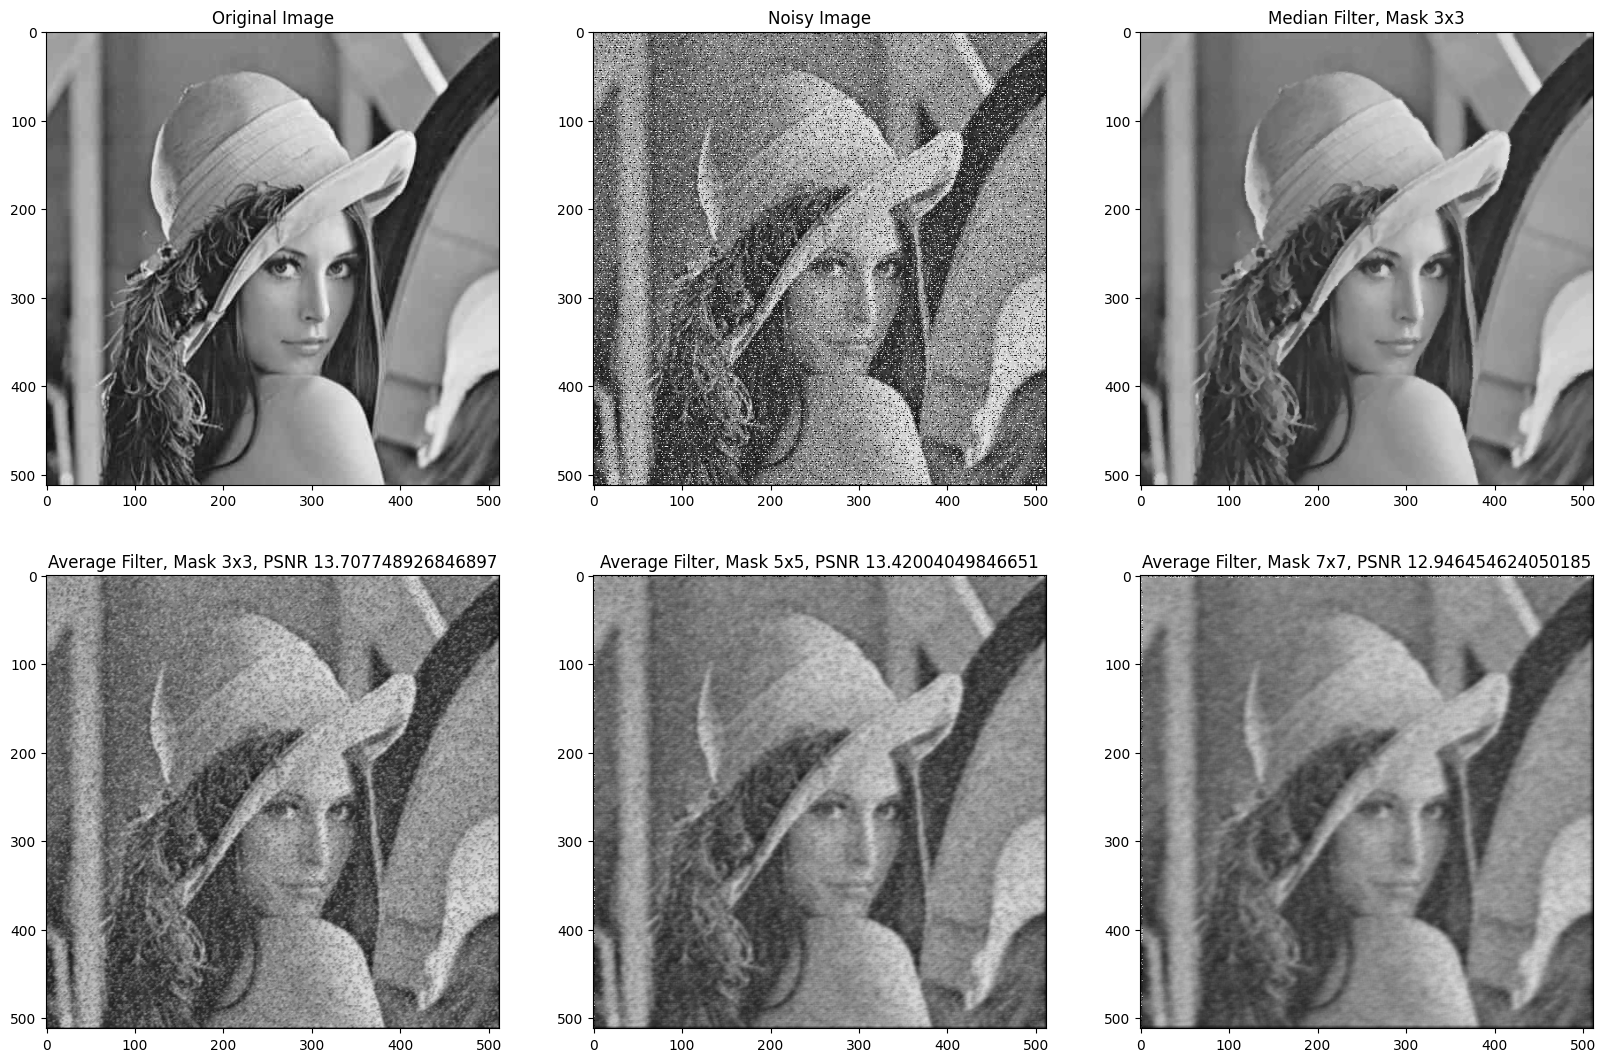

In [178]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.imshow(original_img,cmap='gray')
plt.title("Original Image")

plt.subplot(3,3,2)
plt.imshow(noisy_img,cmap='gray')
plt.title("Noisy Image")

plt.subplot(3,3,3)
plt.imshow(avg_median_filter(noisy_img,filtertype='median'),cmap='gray')
plt.title("Median Filter, Mask 3x3")

plt.subplot(3,3,4)
plt.imshow(avg_median_filter(noisy_img,filtertype='average'),cmap='gray')
plt.title(f"Average Filter, Mask 3x3, PSNR {cv2.PSNR(avg_median_filter(noisy_img,filtertype='average'),noisy_img)}")

plt.subplot(3,3,5)
plt.imshow(avg_median_filter(noisy_img,filtertype='average',mask_size=5),cmap='gray')
plt.title(f"Average Filter, Mask 5x5, PSNR {cv2.PSNR(avg_median_filter(noisy_img,filtertype='average',mask_size=5),noisy_img)}")

plt.subplot(3,3,6)
plt.imshow(avg_median_filter(noisy_img,filtertype='average',mask_size=7),cmap='gray')
plt.title(f"Average Filter, Mask 7x7, PSNR {cv2.PSNR(avg_median_filter(noisy_img,filtertype='average',mask_size=7),noisy_img)}")



# 3c. Geometric Mean

In [198]:
def geometric_harmonic_filter (noisy_img, filtertype="geometric",mask_size=3) :

    filtered_img = noisy_img.copy()
    height, width = noisy_img.shape

    mask_size = mask_size
    mask_left = mask_size//2
    mask_right = mask_left+1

    if filtertype=="geometric":
        for i in range (mask_left,height):
            for j in range (mask_left,width):
                neighbourhood = filtered_img[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)]
                neighbourhood = np.clip(neighbourhood,1,None)
                geometric_mean = np.exp(np.mean(np.log(neighbourhood)))
                filtered_img[i][j] = geometric_mean
    else:
        for i in range (mask_left,height):
            for j in range (mask_left,width):
                neighbourhood = filtered_img[(i-mask_left):(i+mask_right),(j-mask_left):(j+mask_right)]
                neighbourhood = np.clip(neighbourhood,1,None)
                sum_term = np.sum(1/neighbourhood)
                filtered_img[i][j] = (mask_size*mask_size)/sum_term
    return filtered_img


# GEOMETRIC MEAN FILTER

effected pixels :  52428


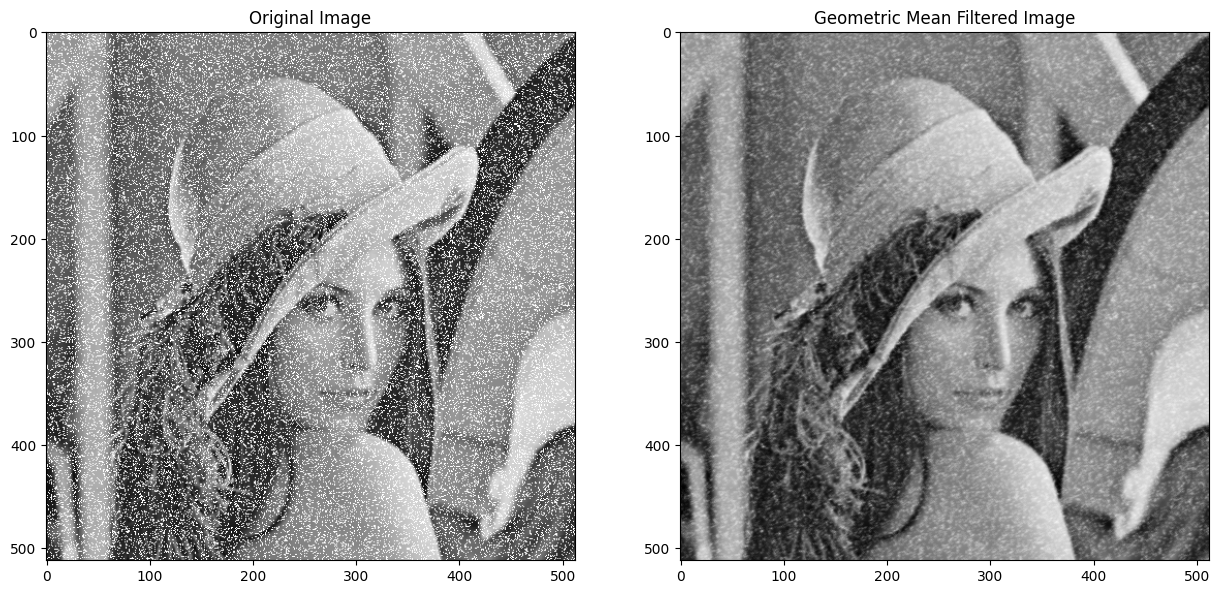

In [199]:
salty_image = salt_pepper(original_img,type='salt',amount=0.2)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(salty_image,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(geometric_harmonic_filter(salty_image,filtertype='geometric',mask_size=3),cmap='gray')
plt.title("Geometric Mean Filtered Image")

plt.show()


# Harmonic Mean Filter

effected pixels :  52428


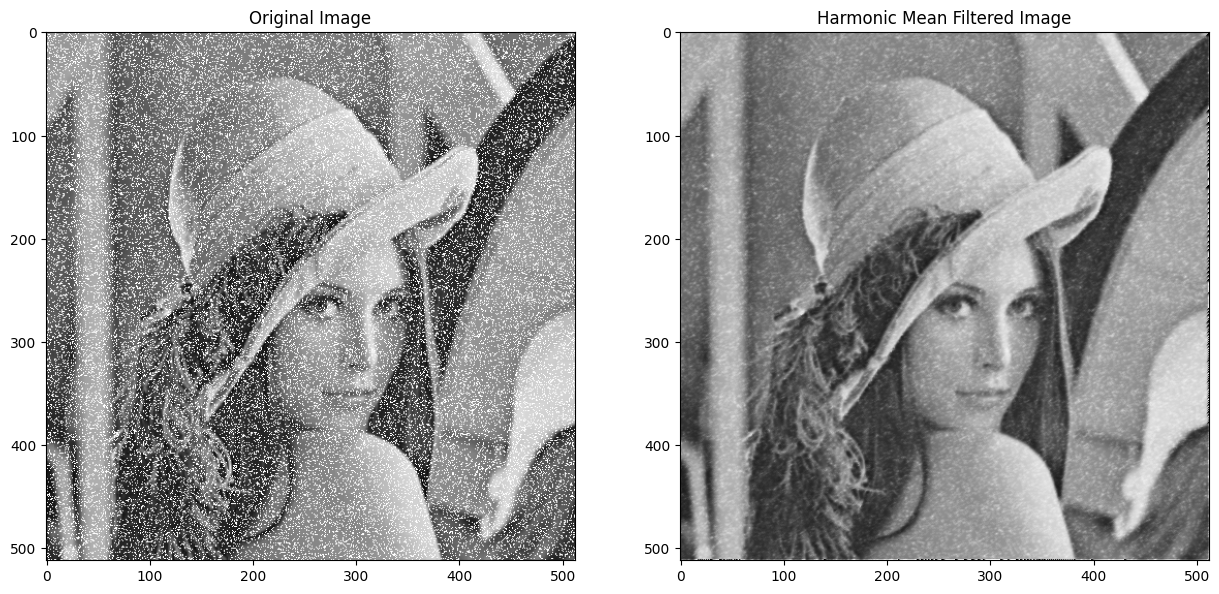

In [200]:
salty_image = salt_pepper(original_img,type='salt',amount=0.2)

plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(salty_image,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(geometric_harmonic_filter(salty_image,filtertype='harmonic',mask_size=3),cmap='gray')
plt.title("Harmonic Mean Filtered Image")

plt.show()
